<a href="https://www.kaggle.com/code/wilkingchalialphonse/ny-tlc-yellow-trips-2019-2022?scriptVersionId=203991273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Let's Import the libraries we will use

In [1]:
# pandas module & Numpy
import pandas as pd
import numpy as np

# gcp modules
from google.cloud import bigquery

#Viz
import matplotlib.pyplot as plt
import seaborn as sns


Here we create a client and project id to access BigQuery public dataset

In [2]:
project_id = ''
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


Identify Bq as project owner and display tables available

In [3]:
owner_project_id = "bigquery-public-data"

# Construct a reference to the "covid19_google_mobility" dataset
project_dataset = 'new_york_taxi_trips'


dataset_ref = client.dataset(project_dataset, project=owner_project_id)

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Get all the tables in the dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:
    print(table.table_id)


taxi_zone_geom
tlc_fhv_trips_2015
tlc_fhv_trips_2016
tlc_fhv_trips_2017
tlc_green_trips_2014
tlc_green_trips_2015
tlc_green_trips_2016
tlc_green_trips_2017
tlc_green_trips_2018
tlc_green_trips_2019
tlc_green_trips_2020
tlc_green_trips_2021
tlc_green_trips_2022
tlc_green_trips_2023
tlc_yellow_trips_2011
tlc_yellow_trips_2012
tlc_yellow_trips_2013
tlc_yellow_trips_2014
tlc_yellow_trips_2015
tlc_yellow_trips_2016
tlc_yellow_trips_2017
tlc_yellow_trips_2018
tlc_yellow_trips_2019
tlc_yellow_trips_2020
tlc_yellow_trips_2021
tlc_yellow_trips_2022
tlc_yellow_trips_2023


We have:
- 8496 rows
- 1 table of Taxi Zone
- 3 For-Hire Vehicle tables
- 10 Green taxi tables
- 13 Yellow cabs table

In [4]:
dataset_ref = client.dataset("new_york_taxi_trips", project="bigquery-public-data")
table_ref = dataset_ref.table("tlc_yellow_trips_2022")

Let's display 2022 table 

In [5]:
client.list_rows(table_ref, max_results=5).to_dataframe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,1,2022-01-01 00:40:15+00:00,2022-01-01 01:09:48+00:00,1,10.300000000,1.0,N,1,33.000000000,3.000000000,0.500000000,13.000000000,6.550000000,0.300000000,0E-9,56.350000000,138,161,2022,1
1,2,2022-01-01 00:46:09+00:00,2022-01-01 01:08:06+00:00,6,5.950000000,1.0,N,1,20.000000000,0.500000000,0.500000000,4.760000000,0E-9,0.300000000,0E-9,28.560000000,79,238,2022,1
2,2,2022-01-01 18:04:06+00:00,2022-01-01 18:40:52+00:00,1,9.700000000,1.0,N,1,34.500000000,0.500000000,0.500000000,9.220000000,6.550000000,0.300000000,1.250000000,55.320000000,138,48,2022,1
3,2,2022-01-01 00:55:48+00:00,2022-01-01 01:14:24+00:00,1,6.670000000,1.0,N,1,21.000000000,0.500000000,0.500000000,15.000000000,0E-9,0.300000000,1.250000000,41.050000000,138,229,2022,1
4,2,2022-01-01 00:42:45+00:00,2022-01-01 00:56:15+00:00,2,6.490000000,1.0,N,1,19.500000000,0.500000000,0.500000000,6.620000000,0E-9,0.300000000,1.250000000,28.670000000,138,112,2022,1


This is the link to the main dataset

- https://console.cloud.google.com/bigquery?project=formal-thunder-423117-r9&ws=!1m4!1m3!3m2!1sbigquery-public-data!2snew_york_taxi_trips

## Let's ask some question about our dataset

How many trips did we have in 2022?

In [6]:
query = """
    SELECT COUNT(*) AS num_trips
    FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
"""

query_job = client.query(query)
results = query_job.result()  # Waits for the query to finish

for row in results:
    print(f"Number of trips: {row.num_trips}")

Number of trips: 36256539


Which one was the pickup location with the most customers in year 2022?

In [7]:
query = """
SELECT
  pickup_location_id,
  COUNT(*) AS max_pickup_location
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
GROUP BY
  pickup_location_id
ORDER BY
  max_pickup_location DESC
LIMIT 10
"""

query_job = client.query(query)
results = query_job.result()

# Convert to Pandas DataFrame
df = results.to_dataframe()
df

,pickup_location_id,max_pickup_location
0,132,1743244
1,237,1696345
2,236,1508812
3,161,1449470
4,186,1183757
5,162,1177979
6,142,1174453
7,230,1119571
8,170,1116450
9,48,1107894


Let's see a trip count per month

In [8]:
query = """
SELECT DATE_TRUNC(pickup_datetime, Month) AS Month, COUNT(*) AS month_trip_count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
GROUP BY month
ORDER BY month DESC
limit 10

"""

query_job = client.query(query)
results = query_job.result()

df1 = results.to_dataframe()
df1

,Month,month_trip_count
0,2023-04-01 00:00:00+00:00,1
1,2022-12-01 00:00:00+00:00,57
2,2022-11-01 00:00:00+00:00,3252628
3,2022-10-01 00:00:00+00:00,3675372
4,2022-09-01 00:00:00+00:00,3183783
5,2022-08-01 00:00:00+00:00,3152693
6,2022-07-01 00:00:00+00:00,3174362
7,2022-06-01 00:00:00+00:00,3557691
8,2022-05-01 00:00:00+00:00,3588291
9,2022-04-01 00:00:00+00:00,3599901


What was the average fare by pickup location?

In [9]:
query = """
SELECT
  pickup_location_id,
  AVG(fare_amount) AS avg_fare
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
GROUP BY
  pickup_location_id
ORDER BY
  avg_fare DESC
  limit 10
"""

query_job = client.query(query)
results = query_job.result()

df2 = results.to_dataframe()
df2

,pickup_location_id,avg_fare
0,1,84.983086985
1,84,76.480714286
2,251,70.122285714
3,5,68.206764168
4,156,64.908955224
5,204,64.690476190
6,44,60.583890339
7,265,58.173549817
8,176,56.500000000
9,109,53.164680851


Let's see the trip distance average

In [10]:
query = """
SELECT
  trip_distance,
  COUNT(*) AS trip_count
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
GROUP BY
  trip_distance
ORDER BY
  trip_distance DESC
  limit 10
"""

query_job = client.query(query)
results = query_job.result()

df3 = results.to_dataframe()
df3.mean()

trip_distance    339967.308
trip_count              1.0
dtype: object

How did COVID-19 impact NY transportation fare amount between 2019-2020?

In [11]:
query = """
SELECT
  t19.trip_distance AS trip_distance_2019,
  t20.trip_distance AS trip_distance_2020,
  t19.fare_amount AS fare_amount_2019,
  t20.fare_amount AS fare_amount_2020
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2019` AS t19
INNER JOIN
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2020` AS t20
ON
  t19.vendor_id = t20.vendor_id
WHERE
  t19.pickup_datetime BETWEEN '2019-01-01' AND '2019-06-30'
  AND t20.pickup_datetime BETWEEN '2020-01-01' AND '2020-06-30'
  limit 10
"""

query_job = client.query(query)
results = query_job.result()

df4 = results.to_dataframe()
df4  

,trip_distance_2019,trip_distance_2020,fare_amount_2019,fare_amount_2020
0,0.490000000,18.500000000,6.200000000,47.020000000
1,0.490000000,10.860000000,6.200000000,59.240000000
2,0.490000000,6.340000000,6.200000000,27.170000000
3,0.490000000,9.530000000,6.200000000,28.570000000
4,0.490000000,6.180000000,6.200000000,21.560000000
5,0.490000000,7.030000000,6.200000000,30.720000000
6,0.490000000,7.030000000,6.200000000,30.720000000
7,0.490000000,7.030000000,6.200000000,30.720000000
8,0.490000000,7.030000000,6.200000000,30.720000000
9,0.490000000,2.890000000,6.200000000,16.620000000


Let's understand some of our outliers finding the highest fare paid by customers

In [12]:
query = """
SELECT
  MAX(fare_amount) AS max_amount, AVG(fare_amount) AS average_amount
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`

"""

query_job = client.query(query)
results = query_job.result()

df50 = results.to_dataframe()
df50

,max_amount,average_amount
0,401092.320000000,14.649168321


In [13]:
query = """
SELECT
  fare_amount,
  COUNT(*) AS trip_count
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
GROUP BY
  fare_amount
HAVING
  fare_amount > 200
ORDER BY
  trip_count
  limit 10;

"""

query_job = client.query(query)
results = query_job.result()

df5 = results.to_dataframe()
df5

,fare_amount,trip_count
0,874.500000000,1
1,202.020000000,1
2,369.400000000,1
3,652.500000000,1
4,498.750000000,1
5,270.100000000,1
6,392.200000000,1
7,271.110000000,1
8,325.500000000,1
9,384.500000000,1


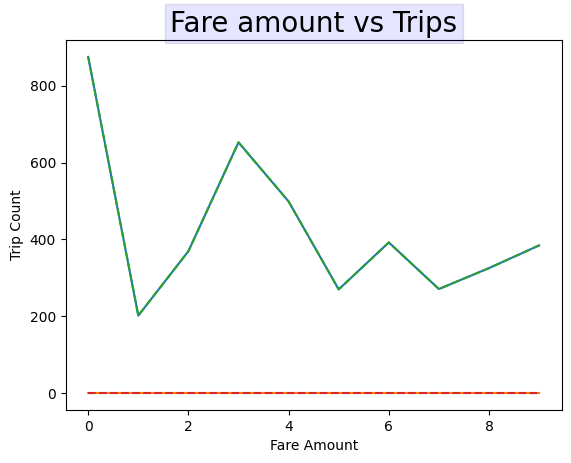

In [14]:
fig = plt.figure()
x = df5
plt.plot(x, '-');
plt.title("Fare amount vs Trips", size=20, bbox=dict(facecolor='blue', alpha=0.1))
plt.xlabel("Fare Amount")
plt.ylabel("Trip Count")
plt.plot(x, '--');

What was the most used payment type?

In [15]:
query = """
SELECT
  payment_type,
  COUNT(*) AS trip_count
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
  GROUP BY
  payment_type 
ORDER BY payment_type 
LIMIT 10
"""

query_job = client.query(query)
results = query_job.result()

df6 = results.to_dataframe()
df6

,payment_type,trip_count
0,0,1241840
1,1,27531946
2,2,7102477
3,3,172427
4,4,207844
5,5,5


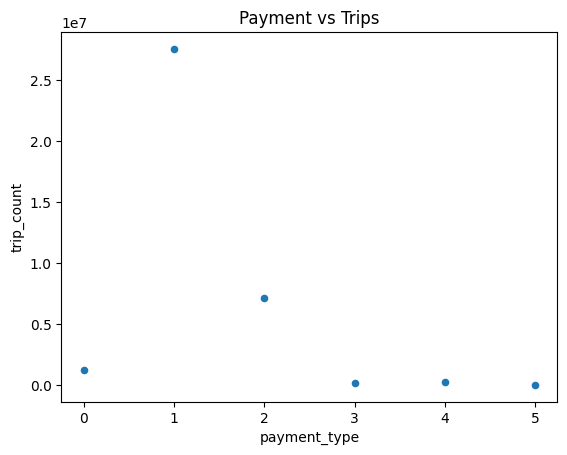

In [16]:
df6.plot(
    x = 'payment_type',
    y = 'trip_count',
    kind='scatter',
)
plt.title('Payment vs Trips') ;

What was the correlation of average trip distance and fare amount between 2019 and 2022?

In [17]:
query = """
WITH CombinedData AS (
  SELECT *
  FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2019`
  UNION ALL
  SELECT *
  FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2020`
  UNION ALL
  SELECT *
  FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021`
  UNION ALL
  SELECT *
  FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
)
SELECT
   data_file_year AS year,
  AVG(trip_distance) AS avg_trip_distance,
  AVG(fare_amount) AS avg_fare
FROM
  CombinedData
GROUP BY
  year
LIMIT 10
"""

query_job = client.query(query)
results = query_job.result()

df7 = results.to_dataframe()
df7

,year,avg_trip_distance,avg_fare
0,2020,3.527101117,12.667778214
1,2021,6.922689675,13.519338117
2,2019,3.018350902,13.412640750
3,2022,6.077670271,14.649168321


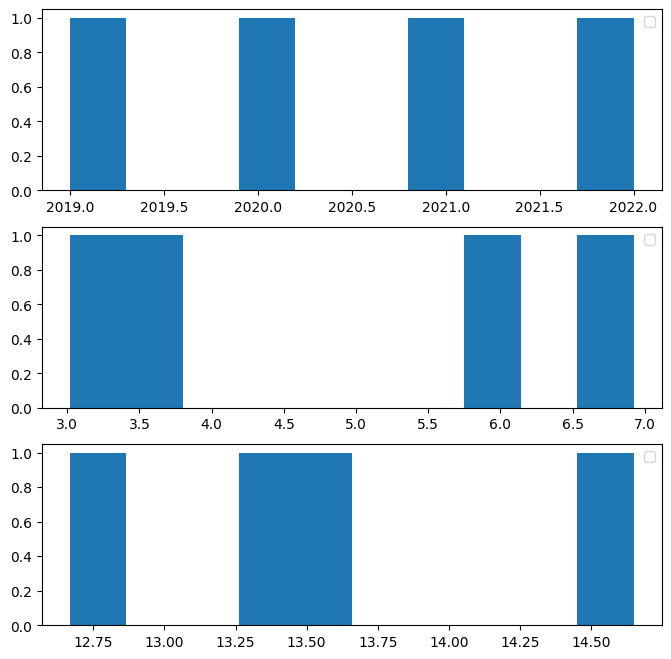

In [18]:
fig, axs = plt.subplots(3, figsize = (8,8))
for i, sp in enumerate(axs.flatten()):
  sp.hist(df7[df7.columns[i]])
  sp.legend()

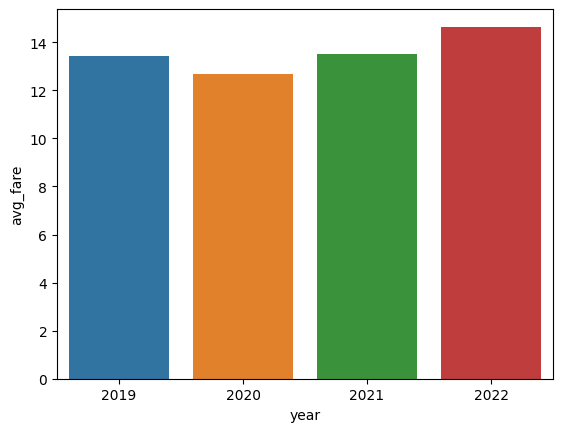

In [19]:
sns.barplot(x='year', y='avg_fare', data=df7)
plt.show()

In [20]:
client.list_rows(table_ref, max_results=5).to_dataframe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,1,2022-01-01 00:40:15+00:00,2022-01-01 01:09:48+00:00,1,10.300000000,1.0,N,1,33.000000000,3.000000000,0.500000000,13.000000000,6.550000000,0.300000000,0E-9,56.350000000,138,161,2022,1
1,2,2022-01-01 00:46:09+00:00,2022-01-01 01:08:06+00:00,6,5.950000000,1.0,N,1,20.000000000,0.500000000,0.500000000,4.760000000,0E-9,0.300000000,0E-9,28.560000000,79,238,2022,1
2,2,2022-01-01 18:04:06+00:00,2022-01-01 18:40:52+00:00,1,9.700000000,1.0,N,1,34.500000000,0.500000000,0.500000000,9.220000000,6.550000000,0.300000000,1.250000000,55.320000000,138,48,2022,1
3,2,2022-01-01 00:55:48+00:00,2022-01-01 01:14:24+00:00,1,6.670000000,1.0,N,1,21.000000000,0.500000000,0.500000000,15.000000000,0E-9,0.300000000,1.250000000,41.050000000,138,229,2022,1
4,2,2022-01-01 00:42:45+00:00,2022-01-01 00:56:15+00:00,2,6.490000000,1.0,N,1,19.500000000,0.500000000,0.500000000,6.620000000,0E-9,0.300000000,1.250000000,28.670000000,138,112,2022,1
